# Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#test data => naming it validation data
X_valid = X_test
y_valid = y_test

# Data Visualization and augmentation

In [ ]:
def final_plot_samples(X_train, y_train):
  labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck']
  y_train_description = []

  for i in range(len(y_train)):
    className = y_train[i]
    y_train_description.append(labels[int(className)])
  y_train_description = np.array(y_train_description)
  dictionary = {
      "class" : y_train[:,0],
      "class_description": y_train_description
  }
  df = pd.DataFrame(dictionary)

  def show_image_of_index(index, label = "default"):
    arr = X_train[index]
    plt.ylabel(label)
    plt.imshow(arr.astype(int), interpolation='nearest')
    plt.show()  
  def plot_samples(): #Plotting two samples from each class
    for i in range(10):
      idxes = df[df["class"] == i].index
      idx0 = idxes[0]
      l0 = df.iloc[idx0]["class_description"]

      idx1 = idxes[1]
      l1 = df.iloc[idx0]["class_description"]


      show_image_of_index(idx0, l0)
      show_image_of_index(idx1, l1)
  plot_samples()

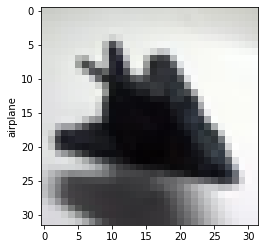

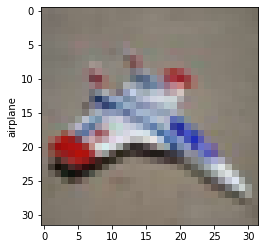

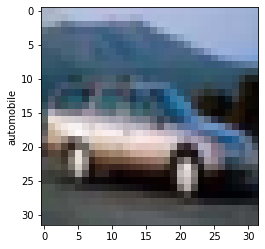

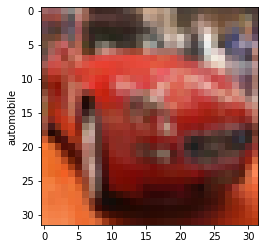

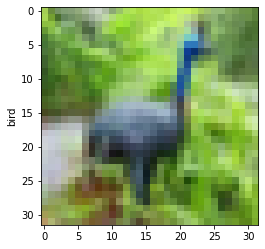

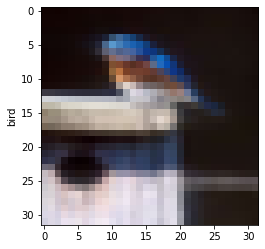

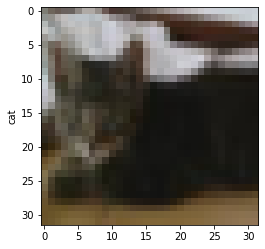

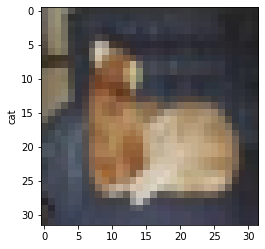

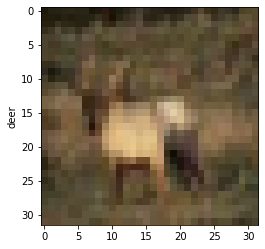

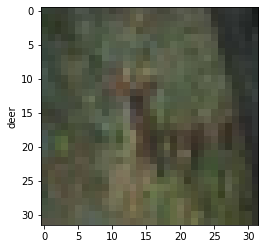

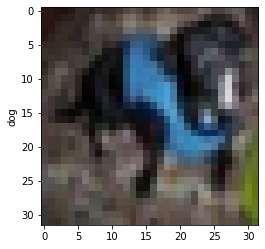

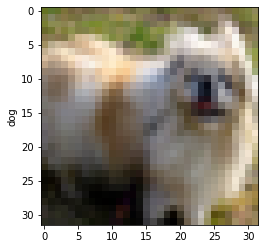

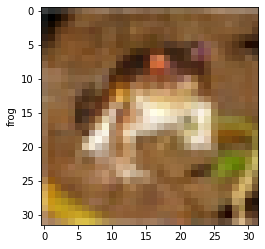

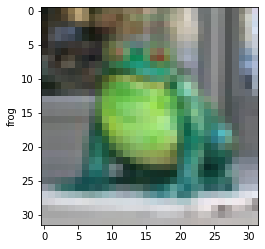

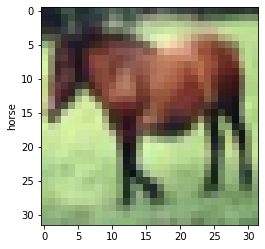

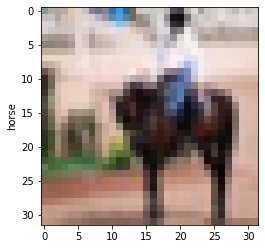

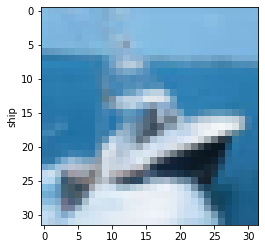

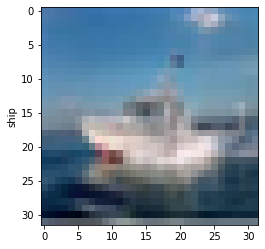

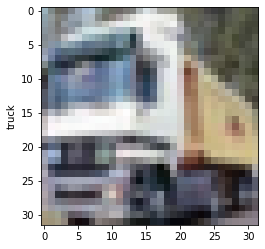

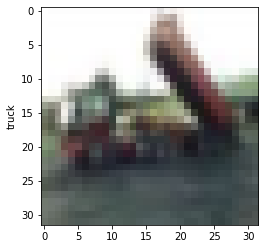

In [ ]:
final_plot_samples(X_train, y_train)

## Image Augmentation

In [ ]:
def rotation_range():
  datagen = ImageDataGenerator(rotation_range=90)

  # fit parameters from data
  datagen.fit(X_train)
  # configure batch size and retrieve one batch of images
  for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 50000):
    # create a grid of 3x3 images
  #   augmentation_index = []
  # augmentation_desc = []
    final_plot_samples(X_batch, y_batch)
    # print(X_batch.shape)
    # pyplot.show()
    break
def height_shift_range():
  datagen = ImageDataGenerator(height_shift_range=0.2)

  # fit parameters from data
  datagen.fit(X_train)
  # configure batch size and retrieve one batch of images
  for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 50000):
    # create a grid of 3x3 images
  #   augmentation_index = []
  # augmentation_desc = []
    final_plot_samples(X_batch, y_batch)
    # print(X_batch.shape)
    # pyplot.show()
    break


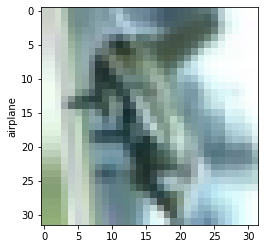

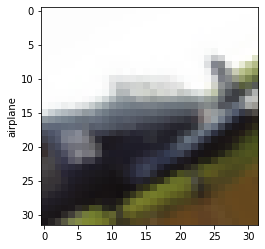

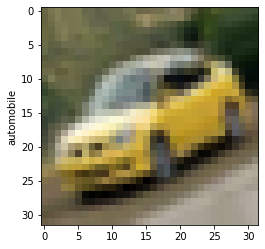

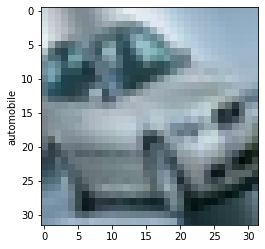

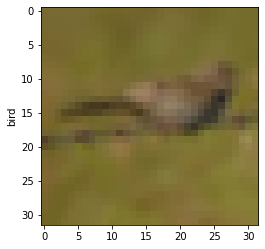

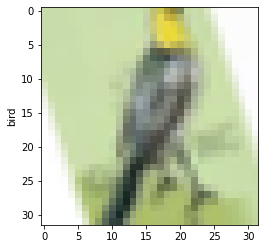

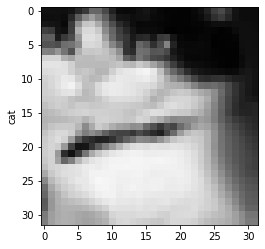

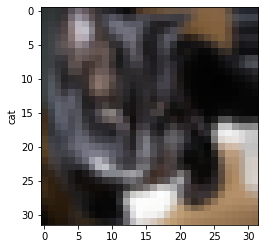

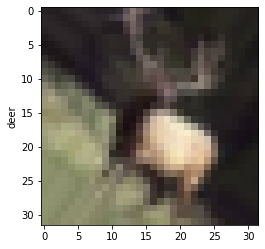

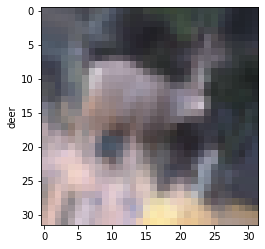

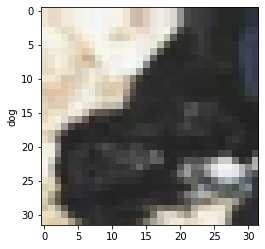

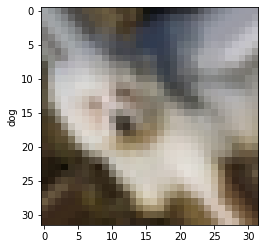

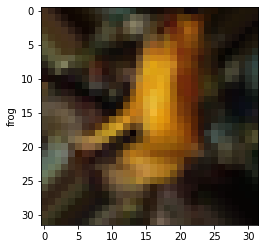

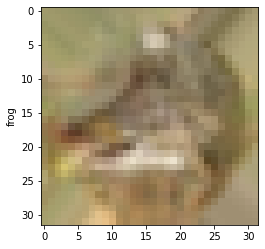

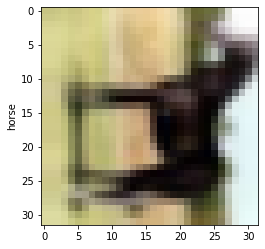

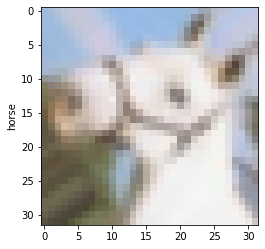

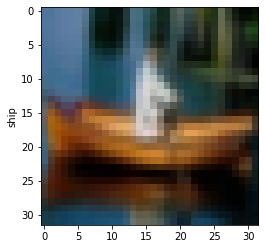

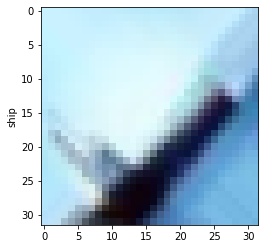

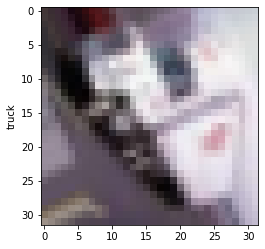

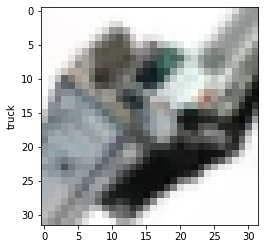

In [ ]:
rotation_range()

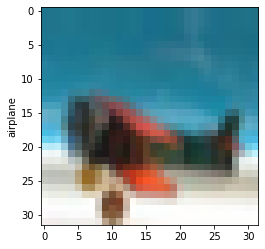

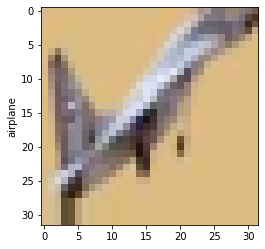

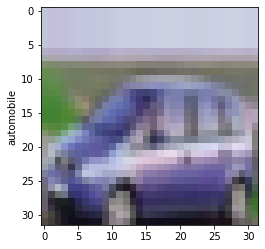

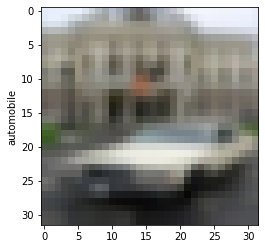

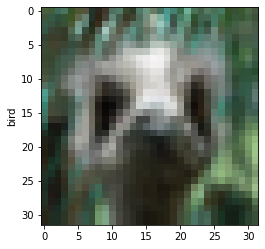

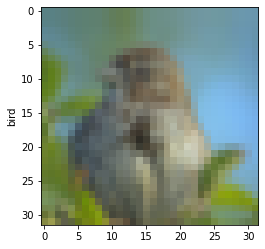

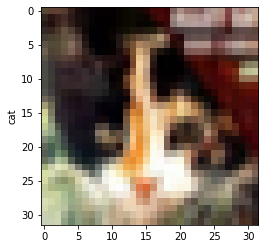

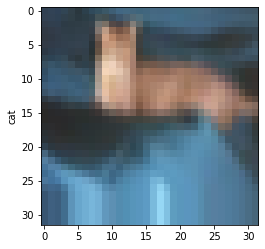

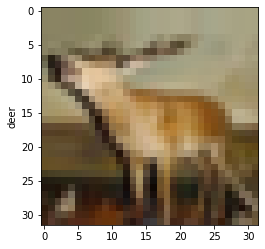

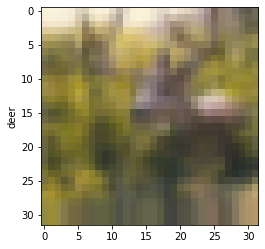

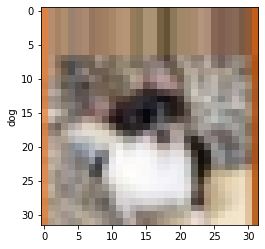

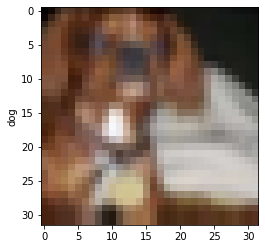

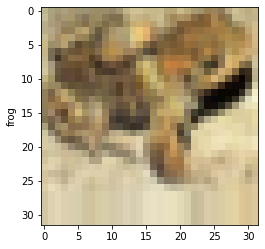

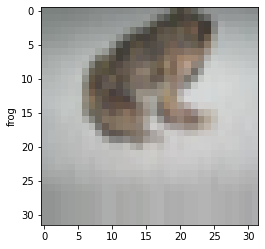

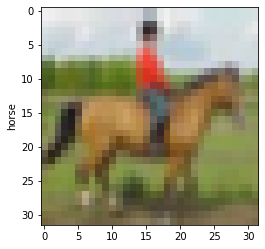

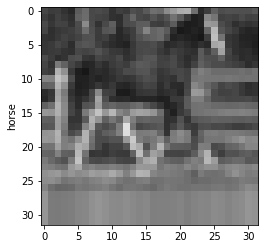

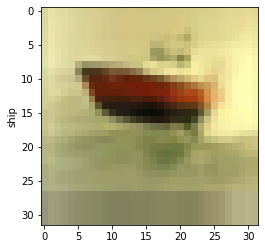

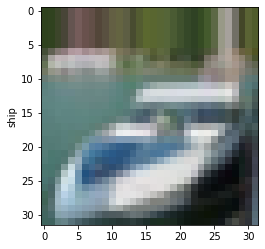

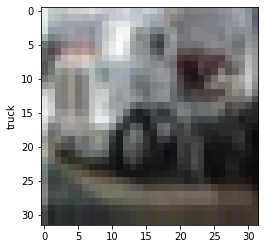

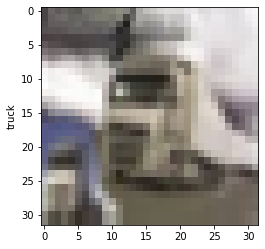

In [ ]:
height_shift_range()

In [ ]:
#training data
X_train
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
#test data => naming it validation data
X_valid = X_test
y_valid = y_test

In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(y_train.shape)
print(y_train.shape)

(50000, 1)
(50000, 1)


# Model 1

## Model Building and Compilation

In [ ]:
epochs = 40

In [ ]:
# we will use results of our hyperparameter tuning
def build_model(hidden_layers = 5, n_neurons=30, learning_rate=3e-3, input_shape=[32, 32, 3]):
  model = keras.models.Sequential()
  # options = {"input_shape": input_shape}
  options = {}
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for i in range(hidden_layers):
    model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01),  **options))
    options = {}

  model.add(keras.layers.Dropout(rate=0.2))
   

  model.add(keras.layers.Dense(10, activation="softmax",  **options))

  # optimizer = keras.optimizers.SGD(learning_rate)
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model1 = build_model(hidden_layers = 8, n_neurons=77, learning_rate= 0.0005270791657748539)
# here we build the model where for each hidden layer appropriate number of hidden units are 77 (result of hyperparameter tuning)
# in the build model we have done l1 regularization
# we have added a dropout layer at the end, it further helps in regularization the output in direct sense
# there the loss function is sparse_categorical_crossentropy
# we have used Adam optimizer and learning rate has been decided by hyperparameter tuning which is 0.0005270791657748539
# we have used accuracy as a metric there


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 77)                236621    
                                                                 
 dense_1 (Dense)             (None, 77)                6006      
                                                                 
 dense_2 (Dense)             (None, 77)                6006      
                                                                 
 dense_3 (Dense)             (None, 77)                6006      
                                                                 
 dense_4 (Dense)             (None, 77)                6006      
                                                                 
 dense_5 (Dense)             (None, 77)                6

In [ ]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback() # callback for printing the total time taken for training

## Model Training

In [ ]:
history = model1.fit(X_train, y_train, 
                    epochs=epochs, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[cb, keras.callbacks.EarlyStopping(patience=10)]) #training the model

Epoch 1/40
1563/1563 [==============================] - 18s 8ms/step - loss: 5.8572 - accuracy: 0.2185 - val_loss: 4.0879 - val_accuracy: 0.3112
Epoch 2/40
1563/1563 [==============================] - 6s 4ms/step - loss: 3.3585 - accuracy: 0.3069 - val_loss: 2.7012 - val_accuracy: 0.3527
Epoch 3/40
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4544 - accuracy: 0.3334 - val_loss: 2.2082 - val_accuracy: 0.3569
Epoch 4/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1268 - accuracy: 0.3500 - val_loss: 1.9964 - val_accuracy: 0.3638
Epoch 5/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0125 - accuracy: 0.3606 - val_loss: 1.9344 - val_accuracy: 0.3675
Epoch 6/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9690 - accuracy: 0.3611 - val_loss: 1.9406 - val_accuracy: 0.3569
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9398 - accuracy: 0.3693 - val_loss: 1.8994 - val_accuracy

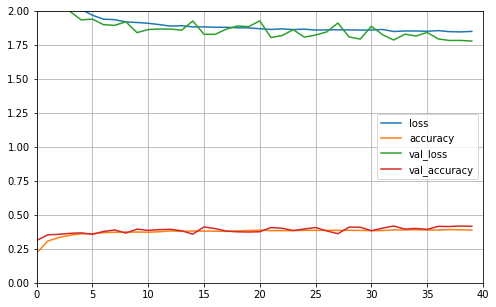

In [ ]:
def plot_history_graphs(history): # for plotting the loss and accuracy history graphs for both train and validation set
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 2) # set the vertical range to [0-2]
  plt.gca().set_xlim(0, epochs) # set the horizontal range to [0-epochs]
  plt.savefig('/content/drive/MyDrive/ml_projects/3_cnn_project/model1.PNG')
  plt.show()

plot_history_graphs(history)

In [ ]:
print(cb.logs)

[17.615877327000007, 6.295745583000013, 6.344447717999998, 6.900813229000008, 6.88211865800001, 6.318138208999997, 6.363685146999984, 8.097850915999999, 6.911758155000001, 6.851224357000007, 6.22005712699999, 6.346430491000007, 6.993159595999998, 6.935129180999979, 6.25586977399999, 6.584972125000007, 7.061692298000025, 6.794723067000007, 6.20950946100001, 6.244133089000002, 6.3960651620000135, 6.94624574300002, 6.382643303000009, 7.03411591699998, 6.427571901999983, 6.901205943000008, 6.900415783999961, 6.372431121000034, 7.14863994000001, 6.357308463000038, 6.357534634999979, 6.644800620000012, 6.962306708000028, 6.3000169320000055, 6.934296949000043, 7.04740351800001, 6.220336042999975, 6.332833249999965, 6.866656647000013, 6.8993287609999925]


In [ ]:
print(sum(cb.logs)) #time taken for training

277.6594928490001


## Model Evaluation

In [ ]:
loss_accuracy = pd.DataFrame(history.history)

In [ ]:
loss_accuracy

,loss,accuracy,val_loss,val_accuracy
0,5.857204,0.21846,4.087916,0.3112
1,3.358474,0.30692,2.701228,0.3527
2,2.454402,0.33336,2.208180,0.3569
3,2.126764,0.35004,1.996401,0.3638
4,2.012541,0.36062,1.934377,0.3675
5,1.969002,0.36106,1.940572,0.3569
6,1.939842,0.36926,1.899437,0.3776
7,1.936261,0.37218,1.894518,0.3888
8,1.919530,0.37278,1.920500,0.3660
9,1.915466,0.37368,1.840847,0.3950


In [ ]:
loss_accuracy.iloc[-1] # Printing the final train and validation loss and accuracy

loss            1.849893
accuracy        0.387880
val_loss        1.778783
val_accuracy    0.415700
Name: 39, dtype: float64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predictions = model1.predict(X_valid)

In [ ]:
y_predictions

array([[0.04365966, 0.02953614, 0.11437624, ..., 0.03801645, 0.05632146,
        0.03213996],
       [0.0876565 , 0.3753264 , 0.00571421, ..., 0.00574275, 0.13869008,
        0.37746775],
       [0.1169998 , 0.25968498, 0.00910123, ..., 0.00734202, 0.28610668,
        0.30270296],
       ...,
       [0.01720785, 0.00751974, 0.07185534, ..., 0.14475371, 0.00609501,
        0.01148337],
       [0.01800962, 0.02214697, 0.15201841, ..., 0.10127541, 0.00441536,
        0.01488485],
       [0.02749631, 0.00786106, 0.13346195, ..., 0.47272372, 0.00247172,
        0.01121732]], dtype=float32)

In [ ]:
y_predict = []
for i in range(len(y_predictions)):
  y_predict.append(np.argmax(y_predictions[i]))

In [ ]:
print(len(y_predict))
print(len(y_valid))

10000
10000


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck']

In [ ]:
print(classification_report(y_valid, y_predict, target_names=labels))
print(confusion_matrix(y_valid, y_predict))

              precision    recall  f1-score   support

    airplane       0.49      0.53      0.51      1000
  automobile       0.55      0.56      0.56      1000
        bird       0.32      0.19      0.24      1000
         cat       0.24      0.10      0.14      1000
        deer       0.37      0.25      0.30      1000
         dog       0.37      0.36      0.36      1000
        frog       0.37      0.56      0.44      1000
       horse       0.34      0.69      0.45      1000
        ship       0.65      0.43      0.52      1000
       truck       0.47      0.49      0.48      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.40     10000
weighted avg       0.42      0.42      0.40     10000

[[527  53  58  26  18  24  22 110  88  74]
 [ 44 563   9  16   5  24  43  72  30 194]
 [119  28 193  28 149  82 179 193  17  12]
 [ 33  22  66  98  35 250 256 191  18  31]
 [ 54   7  99  16 249  45 196 302  14  18]
 [ 23  23  74  60  54 358 

In [ ]:
report = classification_report(y_valid, y_predict, target_names=labels, output_dict=True)
df = pd.DataFrame(report).transpose()
sorted_d = df[:-3].sort_values(by="f1-score")
lowest = sorted_d.index[0]
highest = sorted_d.index[-1]
print((lowest, highest))
sl = sorted_d.loc[lowest]["f1-score"]
sh = sorted_d.loc[highest]["f1-score"]
print((sl, sh))

('cat', 'automobile')
(0.13881019830028332, 0.5577018325903912)


In [ ]:
print("if we see the f1-score, we find", sh,  "is the maximum (which belongs to class", highest ,")") 
print("and", sl, "is minimum (which belongs to class ", lowest, ")")
print("So the best class is", highest, "and worst class is ", lowest)

if we see the f1-score, we find 0.5577018325903912 is the maximum (which belongs to class automobile )
and 0.13881019830028332 is minimum (which belongs to class  cat )
So the best class is automobile and worst class is  cat


In [ ]:
y_predictions

array([[0.04365966, 0.02953614, 0.11437624, ..., 0.03801645, 0.05632146,
        0.03213996],
       [0.0876565 , 0.3753264 , 0.00571421, ..., 0.00574275, 0.13869008,
        0.37746775],
       [0.1169998 , 0.25968498, 0.00910123, ..., 0.00734202, 0.28610668,
        0.30270296],
       ...,
       [0.01720785, 0.00751974, 0.07185534, ..., 0.14475371, 0.00609501,
        0.01148337],
       [0.01800962, 0.02214697, 0.15201841, ..., 0.10127541, 0.00441536,
        0.01488485],
       [0.02749631, 0.00786106, 0.13346195, ..., 0.47272372, 0.00247172,
        0.01121732]], dtype=float32)

In [ ]:
y_valid[:,0].shape

(10000,)

In [ ]:
corresponding_probability = []
for i in range(len(y_valid)):
  corresponding_probability.append(y_predictions[i][y_valid[:,0][i]])

In [ ]:
print(len(np.array(y_valid)))
print(len(corresponding_probability))
print(len(y_predict))

10000
10000
10000


In [ ]:
data = {
    'Real_Class':list(y_valid[:,0]),
     "Probability": list(corresponding_probability), 
     "Predicted_Class": list(y_predict)
}

In [ ]:
dfi = pd.DataFrame(data)

In [ ]:
dfi[dfi["Real_Class"] == 0].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
3219,0,0.007960,6
1026,0,0.009149,6


In [ ]:
dfi[dfi["Real_Class"] == 1].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
8741,1,0.004624,7
3528,1,0.005780,7


In [ ]:
dfi[dfi["Real_Class"] == 2].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6533,2,0.007020,9
9686,2,0.008249,1


In [ ]:
dfi[dfi["Real_Class"] == 3].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
5206,3,0.010977,7
8484,3,0.012277,1


In [ ]:
dfi[dfi["Real_Class"] == 4].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
802,4,0.004961,0
1693,4,0.009214,8


In [ ]:
dfi[dfi["Real_Class"] == 5].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
5098,5,0.002527,1
7119,5,0.004226,0


In [ ]:
dfi[dfi["Real_Class"] == 6].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
3325,6,0.002689,1
9735,6,0.006588,8


In [ ]:
dfi[dfi["Real_Class"] == 7].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
2440,7,0.006345,8
2376,7,0.008085,9


In [ ]:
dfi[dfi["Real_Class"] == 8].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
4085,8,0.000920,7
5207,8,0.001165,7


In [ ]:
dfi[dfi["Real_Class"] == 9].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6369,9,0.007751,4
4590,9,0.009961,2


# Model 2

## Model Building and Compilation

In [ ]:
# we will use results of our hyperparameter tuning
def build_model(hidden_layers = 5, n_neurons=30, learning_rate=3e-3, input_shape=[32, 32, 3]):
  model = keras.models.Sequential()
  # options = {"input_shape": input_shape}
  options = {}
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for i in range(hidden_layers):
    model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01),  **options))
    options = {}

  model.add(keras.layers.Dropout(rate=0.2))
   

  model.add(keras.layers.Dense(10, activation="softmax",  **options))

  optimizer = keras.optimizers.SGD(learning_rate)
  # optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model2 = build_model(hidden_layers = 8, n_neurons=77, learning_rate= 0.0005270791657748539)
# here we build the model where for each hidden layer appropriate number of hidden units are 77 (result of hyperparameter tuning)
# we have added a dropout layer at the end, it further helps in regularization the output in direct sense
# there the loss function is sparse_categorical_crossentropy
# we have used Adam optimizer and learning rate has been decided by hyperparameter tuning which is 0.0005270791657748539
# we have used accuracy as a metric there


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 77)                236621    
                                                                 
 dense_10 (Dense)            (None, 77)                6006      
                                                                 
 dense_11 (Dense)            (None, 77)                6006      
                                                                 
 dense_12 (Dense)            (None, 77)                6006      
                                                                 
 dense_13 (Dense)            (None, 77)                6006      
                                                                 
 dense_14 (Dense)            (None, 77)               

## Model Training

In [ ]:
history = model2.fit(X_train, y_train, 
                    epochs=epochs, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[cb, keras.callbacks.EarlyStopping(patience=10)]) #training the model

Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 9.0755 - accuracy: 0.1498 - val_loss: 8.8604 - val_accuracy: 0.1999
Epoch 2/40
1563/1563 [==============================] - 7s 4ms/step - loss: 8.7354 - accuracy: 0.2014 - val_loss: 8.5728 - val_accuracy: 0.2266
Epoch 3/40
1563/1563 [==============================] - 7s 4ms/step - loss: 8.4701 - accuracy: 0.2166 - val_loss: 8.3100 - val_accuracy: 0.2412
Epoch 4/40
1563/1563 [==============================] - 7s 5ms/step - loss: 8.2213 - accuracy: 0.2204 - val_loss: 8.0688 - val_accuracy: 0.2355
Epoch 5/40
1563/1563 [==============================] - 7s 4ms/step - loss: 7.9847 - accuracy: 0.2309 - val_loss: 7.8305 - val_accuracy: 0.2283
Epoch 6/40
1563/1563 [==============================] - 6s 4ms/step - loss: 7.7481 - accuracy: 0.2419 - val_loss: 7.5912 - val_accuracy: 0.2705
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 7.5249 - accuracy: 0.2574 - val_loss: 7.3790 - val_accuracy:

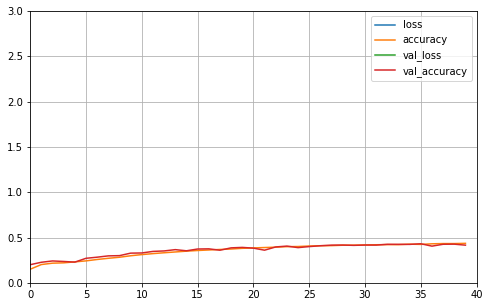

In [ ]:
def plot_history_graphs(history): # for plotting the loss and accuracy history graphs for both train and validation set
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 3) # set the vertical range to [0-3]
  plt.gca().set_xlim(0, epochs) # set the horizontal range to [0-epochs]
  plt.savefig('/content/drive/MyDrive/ml_projects/3_cnn_project/model2.PNG')
  plt.show()

plot_history_graphs(history)

In [ ]:
print(cb.logs)

[17.615877327000007, 6.295745583000013, 6.344447717999998, 6.900813229000008, 6.88211865800001, 6.318138208999997, 6.363685146999984, 8.097850915999999, 6.911758155000001, 6.851224357000007, 6.22005712699999, 6.346430491000007, 6.993159595999998, 6.935129180999979, 6.25586977399999, 6.584972125000007, 7.061692298000025, 6.794723067000007, 6.20950946100001, 6.244133089000002, 6.3960651620000135, 6.94624574300002, 6.382643303000009, 7.03411591699998, 6.427571901999983, 6.901205943000008, 6.900415783999961, 6.372431121000034, 7.14863994000001, 6.357308463000038, 6.357534634999979, 6.644800620000012, 6.962306708000028, 6.3000169320000055, 6.934296949000043, 7.04740351800001, 6.220336042999975, 6.332833249999965, 6.866656647000013, 6.8993287609999925, 8.331807758000025, 6.730169391999993, 6.7051297989999625, 7.221509524999988, 6.914550235999968, 6.161245852000036, 6.228067396000029, 6.12716790799999, 6.006883289999962, 6.0947092970000085, 6.130087365999998, 6.275505143999965, 6.097807391999

In [ ]:
print(sum(cb.logs)) #time taken for training(this includes time taken for training by previous model also)

538.2289768020001


## Model Evaluation

In [ ]:
loss_accuracy = pd.DataFrame(history.history)

In [ ]:
loss_accuracy

,loss,accuracy,val_loss,val_accuracy
0,9.075516,0.14980,8.860417,0.1999
1,8.735362,0.20142,8.572791,0.2266
2,8.470064,0.21662,8.310019,0.2412
3,8.221279,0.22036,8.068789,0.2355
4,7.984654,0.23090,7.830478,0.2283
5,7.748076,0.24194,7.591239,0.2705
6,7.524881,0.25736,7.378987,0.2828
7,7.312399,0.27046,7.176806,0.2972
8,7.108840,0.28206,6.989713,0.2998
9,6.917721,0.29844,6.776803,0.3273


In [ ]:
loss_accuracy.iloc[-1] # Printing the final train and validation loss and accuracy

loss            3.534203
accuracy        0.435500
val_loss        3.535383
val_accuracy    0.415400
Name: 39, dtype: float64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predictions = model2.predict(X_valid)

In [ ]:
y_predictions

array([[0.03419242, 0.03517984, 0.0719002 , ..., 0.03722713, 0.03094793,
        0.0347609 ],
       [0.04131673, 0.22902915, 0.0027746 , ..., 0.00194182, 0.5779007 ,
        0.14127614],
       [0.07904878, 0.06509208, 0.00570179, ..., 0.00369307, 0.7808579 ,
        0.05512004],
       ...,
       [0.01524975, 0.00853521, 0.07286355, ..., 0.05090278, 0.01596458,
        0.01419471],
       [0.021472  , 0.00970624, 0.12596208, ..., 0.03553526, 0.00767782,
        0.01183093],
       [0.05996725, 0.02137147, 0.14131334, ..., 0.2890026 , 0.02294066,
        0.01934972]], dtype=float32)

In [ ]:
y_predict = []
for i in range(len(y_predictions)):
  y_predict.append(np.argmax(y_predictions[i]))

In [ ]:
print(len(y_predict))
print(len(y_valid))

10000
10000


In [ ]:
print(classification_report(y_valid, y_predict, target_names=labels))
print(confusion_matrix(y_valid, y_predict))

              precision    recall  f1-score   support

    airplane       0.53      0.34      0.42      1000
  automobile       0.48      0.68      0.56      1000
        bird       0.33      0.11      0.16      1000
         cat       0.29      0.21      0.24      1000
        deer       0.36      0.34      0.35      1000
         dog       0.38      0.34      0.36      1000
        frog       0.35      0.66      0.46      1000
       horse       0.57      0.34      0.43      1000
        ship       0.41      0.77      0.53      1000
       truck       0.50      0.38      0.43      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.39     10000
weighted avg       0.42      0.42      0.39     10000

[[340  67  44  35  28  13  41  27 365  40]
 [ 19 681   1  16  13  17  22  16 134  81]
 [ 90  47 108  75 192  68 266  50  85  19]
 [ 15  55  35 207  51 226 246  35  76  54]
 [ 54  29  59  46 343  54 283  47  76   9]
 [ 14  41  31 138  82 336 

In [ ]:
report = classification_report(y_valid, y_predict, target_names=labels, output_dict=True)
df = pd.DataFrame(report).transpose()
sorted_d = df[:-3].sort_values(by="f1-score")
lowest = sorted_d.index[0]
highest = sorted_d.index[-1]
print((lowest, highest))
sl = sorted_d.loc[lowest]["f1-score"]
sh = sorted_d.loc[highest]["f1-score"]
print((sl, sh))

('bird', 'automobile')
(0.1627731725697061, 0.5649108253836582)


In [ ]:
print("if we see the f1-score, we find", sh,  "is the maximum (which belongs to class", highest ,")") 
print("and", sl, "is minimum (which belongs to class ", lowest, ")")
print("So the best class is", highest, "and worst class is ", lowest)


if we see the f1-score, we find 0.5649108253836582 is the maximum (which belongs to class automobile )
and 0.1627731725697061 is minimum (which belongs to class  bird )
So the best class is automobile and worst class is  bird


In [ ]:
y_predictions

array([[0.03419242, 0.03517984, 0.0719002 , ..., 0.03722713, 0.03094793,
        0.0347609 ],
       [0.04131673, 0.22902915, 0.0027746 , ..., 0.00194182, 0.5779007 ,
        0.14127614],
       [0.07904878, 0.06509208, 0.00570179, ..., 0.00369307, 0.7808579 ,
        0.05512004],
       ...,
       [0.01524975, 0.00853521, 0.07286355, ..., 0.05090278, 0.01596458,
        0.01419471],
       [0.021472  , 0.00970624, 0.12596208, ..., 0.03553526, 0.00767782,
        0.01183093],
       [0.05996725, 0.02137147, 0.14131334, ..., 0.2890026 , 0.02294066,
        0.01934972]], dtype=float32)

In [ ]:
corresponding_probability = []
for i in range(len(y_valid)):
  corresponding_probability.append(y_predictions[i][y_valid[:,0][i]])

In [ ]:
print(len(np.array(y_valid)))
print(len(corresponding_probability))
print(len(y_predict))

10000
10000
10000


In [ ]:
data = {
    'Real_Class':list(y_valid[:,0]),
     "Probability": list(corresponding_probability), 
     "Predicted_Class": list(y_predict)
}

In [ ]:
dfi = pd.DataFrame(data)

In [ ]:
dfi[dfi["Real_Class"] == 0].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6872,0,0.005393,6
678,0,0.005407,6


In [ ]:
dfi[dfi["Real_Class"] == 1].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
8741,1,0.004492,7
9601,1,0.005811,5


In [ ]:
dfi[dfi["Real_Class"] == 2].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
5324,2,0.005502,9
9686,2,0.007279,1


In [ ]:
dfi[dfi["Real_Class"] == 3].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
878,3,0.003527,8
5309,3,0.004366,8


In [ ]:
dfi[dfi["Real_Class"] == 4].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
2120,4,0.007464,8
1730,4,0.009076,8


In [ ]:
dfi[dfi["Real_Class"] == 5].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
1019,5,0.001049,8
5098,5,0.001893,1


In [ ]:
dfi[dfi["Real_Class"] == 6].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
3325,6,0.002143,1
9735,6,0.002918,8


In [ ]:
dfi[dfi["Real_Class"] == 7].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
2376,7,0.001764,8
2440,7,0.002018,8


In [ ]:
dfi[dfi["Real_Class"] == 8].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6280,8,0.004616,4
1983,8,0.005296,7


In [ ]:
dfi[dfi["Real_Class"] == 9].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
4852,9,0.005094,4
6545,9,0.005219,0


# Model 3

## Model Building and Compilation

In [ ]:
# we will use results of our hyperparameter tuning
def build_model(hidden_layers = 5, n_neurons=30, learning_rate=3e-3, input_shape=[32, 32, 3]):
  model = keras.models.Sequential()
  # options = {"input_shape": input_shape}
  options = {}
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for i in range(hidden_layers):
    model.add(keras.layers.Dense(n_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01),  **options))
    options = {}

  model.add(keras.layers.Dropout(rate=0.2))
   

  model.add(keras.layers.Dense(10, activation="softmax",  **options))

  # optimizer = keras.optimizers.SGD(learning_rate)
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

In [ ]:
model3 = build_model(hidden_layers = 6, n_neurons=60, learning_rate= 0.0005270791657748539)
# here we build the model where for each hidden layer appropriate number of hidden units are 77 (result of hyperparameter tuning)
# in the build model we have done l1 regularization
# we have added a dropout layer, it further helps in regularization the output in direct sense
# there the loss function is sparse_categorical_crossentropy
# we have used Adam optimizer and learning rate has been decided by hyperparameter tuning which is 0.0005270791657748539
# we have used accuracy as a metric there


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 60)                184380    
                                                                 
 dense_19 (Dense)            (None, 60)                3660      
                                                                 
 dense_20 (Dense)            (None, 60)                3660      
                                                                 
 dense_21 (Dense)            (None, 60)                3660      
                                                                 
 dense_22 (Dense)            (None, 60)                3660      
                                                                 
 dense_23 (Dense)            (None, 60)               

## Model Training

In [ ]:
history = model3.fit(X_train, y_train, 
                    epochs=epochs, batch_size = 32,
                    shuffle=True,
                    validation_data=(X_valid, y_valid),
                    callbacks=[cb, keras.callbacks.EarlyStopping(patience=10)]) #training the model

Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 5.0493 - accuracy: 0.1517 - val_loss: 3.8955 - val_accuracy: 0.1790
Epoch 2/40
1563/1563 [==============================] - 7s 4ms/step - loss: 3.3917 - accuracy: 0.1744 - val_loss: 2.9268 - val_accuracy: 0.1911
Epoch 3/40
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6441 - accuracy: 0.1831 - val_loss: 2.3799 - val_accuracy: 0.1991
Epoch 4/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2624 - accuracy: 0.1885 - val_loss: 2.1429 - val_accuracy: 0.1945
Epoch 5/40
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1189 - accuracy: 0.1914 - val_loss: 2.0863 - val_accuracy: 0.1930
Epoch 6/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0800 - accuracy: 0.1927 - val_loss: 2.0763 - val_accuracy: 0.1985
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0708 - accuracy: 0.1954 - val_loss: 2.0846 - val_accuracy:

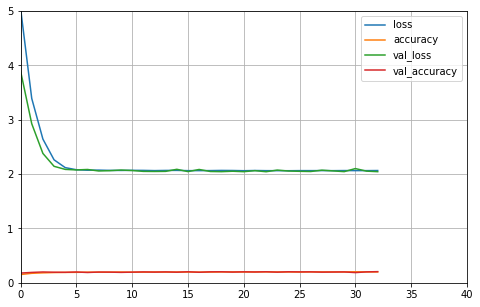

In [ ]:
def plot_history_graphs(history): # for plotting the loss and accuracy history graphs for both train and validation set
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 5) # set the vertical range to [0-5]
  plt.gca().set_xlim(0, epochs) # set the horizontal range to [0-epochs]
  plt.savefig('/content/drive/MyDrive/ml_projects/3_cnn_project/model3.PNG')
  plt.show()

plot_history_graphs(history)

In [ ]:
print(cb.logs)

[17.615877327000007, 6.295745583000013, 6.344447717999998, 6.900813229000008, 6.88211865800001, 6.318138208999997, 6.363685146999984, 8.097850915999999, 6.911758155000001, 6.851224357000007, 6.22005712699999, 6.346430491000007, 6.993159595999998, 6.935129180999979, 6.25586977399999, 6.584972125000007, 7.061692298000025, 6.794723067000007, 6.20950946100001, 6.244133089000002, 6.3960651620000135, 6.94624574300002, 6.382643303000009, 7.03411591699998, 6.427571901999983, 6.901205943000008, 6.900415783999961, 6.372431121000034, 7.14863994000001, 6.357308463000038, 6.357534634999979, 6.644800620000012, 6.962306708000028, 6.3000169320000055, 6.934296949000043, 7.04740351800001, 6.220336042999975, 6.332833249999965, 6.866656647000013, 6.8993287609999925, 8.331807758000025, 6.730169391999993, 6.7051297989999625, 7.221509524999988, 6.914550235999968, 6.161245852000036, 6.228067396000029, 6.12716790799999, 6.006883289999962, 6.0947092970000085, 6.130087365999998, 6.275505143999965, 6.097807391999

In [ ]:
print(sum(cb.logs)) #time taken for training (this includes time taken for training by previous models also)

748.7484477950001


## Model Evaluation

In [ ]:
loss_accuracy = pd.DataFrame(history.history)

In [ ]:
loss_accuracy

,loss,accuracy,val_loss,val_accuracy
0,5.049283,0.15166,3.895536,0.1790
1,3.391685,0.17442,2.926785,0.1911
2,2.644066,0.18308,2.379920,0.1991
3,2.262409,0.18850,2.142946,0.1945
4,2.118896,0.19142,2.086284,0.1930
5,2.080007,0.19266,2.076301,0.1985
6,2.070822,0.19536,2.084639,0.1898
7,2.072824,0.19496,2.057069,0.1976
8,2.067918,0.19618,2.062626,0.1961
9,2.066853,0.19788,2.074150,0.1918


In [ ]:
loss_accuracy.iloc[-1] # Printing the final train and validation loss and accuracy

loss            2.065483
accuracy        0.200220
val_loss        2.044281
val_accuracy    0.205200
Name: 32, dtype: float64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predictions = model3.predict(X_valid)

In [ ]:
y_predictions

array([[0.05487759, 0.0826851 , 0.11417908, ..., 0.13761355, 0.0327416 ,
        0.06051409],
       [0.27156973, 0.14349404, 0.03650167, ..., 0.01306315, 0.3339052 ,
        0.17064294],
       [0.2626768 , 0.14867409, 0.03854741, ..., 0.01511235, 0.32256398,
        0.1770455 ],
       ...,
       [0.02014732, 0.0266312 , 0.14228502, ..., 0.13222982, 0.00772998,
        0.01682943],
       [0.03420037, 0.04835339, 0.13187574, ..., 0.1403278 , 0.01603488,
        0.03251392],
       [0.04716025, 0.06972482, 0.12048507, ..., 0.14022776, 0.02550414,
        0.04908843]], dtype=float32)

In [ ]:
y_predict = []
y_predicted_class_probability = []
for i in range(len(y_predictions)):
  y_predict.append(np.argmax(y_predictions[i]))
  y_predicted_class_probability.append(np.max(y_predictions[i]))


In [ ]:
print(len(y_predict))
print(len(y_valid))

10000
10000


In [ ]:
print(classification_report(y_valid, y_predict, target_names=labels))
print(confusion_matrix(y_valid, y_predict))

              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.14      0.14      0.14      1000
        bird       0.00      0.00      0.00      1000
         cat       0.15      0.07      0.10      1000
        deer       0.00      0.00      0.00      1000
         dog       0.15      0.26      0.19      1000
        frog       0.21      0.69      0.32      1000
       horse       0.00      0.00      0.00      1000
        ship       0.29      0.59      0.39      1000
       truck       0.20      0.30      0.24      1000

    accuracy                           0.21     10000
   macro avg       0.11      0.21      0.14     10000
weighted avg       0.11      0.21      0.14     10000

[[  0 115   0  39   0  73  57   0 489 227]
 [  0 145   0  44   0 136  99   0 313 263]
 [  0  97   0  41   0 209 467   0  89  97]
 [  0 111   0  71   0 281 420   0  33  84]
 [  0  61   0  32   0 179 623   0  40  65]
 [  0 113   0  74   0 259 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report = classification_report(y_valid, y_predict, target_names=labels, output_dict=True)
df = pd.DataFrame(report).transpose()
sorted_d = df[:-3].sort_values(by="f1-score")
lowest = sorted_d.index[0]
highest = sorted_d.index[-1]
print((lowest, highest))
sl = sorted_d.loc[lowest]["f1-score"]
sh = sorted_d.loc[highest]["f1-score"]
print((sl, sh))

('airplane', 'ship')
(0.0, 0.3865435356200528)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("if we see the f1-score, we find", sh,  "is the maximum (which belongs to class", highest ,")") 
print("and", sl, "is minimum (which belongs to class ", lowest, ")")
print("So the best class is", highest, "and worst class is ", lowest)


if we see the f1-score, we find 0.3865435356200528 is the maximum (which belongs to class ship )
and 0.0 is minimum (which belongs to class  airplane )
So the best class is ship and worst class is  airplane


In [ ]:
y_predictions

array([[0.05487759, 0.0826851 , 0.11417908, ..., 0.13761355, 0.0327416 ,
        0.06051409],
       [0.27156973, 0.14349404, 0.03650167, ..., 0.01306315, 0.3339052 ,
        0.17064294],
       [0.2626768 , 0.14867409, 0.03854741, ..., 0.01511235, 0.32256398,
        0.1770455 ],
       ...,
       [0.02014732, 0.0266312 , 0.14228502, ..., 0.13222982, 0.00772998,
        0.01682943],
       [0.03420037, 0.04835339, 0.13187574, ..., 0.1403278 , 0.01603488,
        0.03251392],
       [0.04716025, 0.06972482, 0.12048507, ..., 0.14022776, 0.02550414,
        0.04908843]], dtype=float32)

In [ ]:
corresponding_probability = []
for i in range(len(y_valid)):
  corresponding_probability.append(y_predictions[i][y_valid[:,0][i]])

In [ ]:
print(len(np.array(y_valid)))
print(len(corresponding_probability))
print(len(y_predict))

10000
10000
10000


In [ ]:
data = {
    'Real_Class':list(y_valid[:,0]),
     "Probability": list(corresponding_probability), 
     "Predicted_Class": list(y_predict)
}


In [ ]:
dfi = pd.DataFrame(data)

In [ ]:
dfi

,Real_Class,Probability,Predicted_Class
0,3,0.148140,5
1,8,0.333905,8
2,8,0.322564,8
3,0,0.210471,8
4,6,0.204220,6
...,...,...,...
9995,8,0.250001,8
9996,3,0.125673,6
9997,5,0.139458,6
9998,1,0.048353,6


In [ ]:
dfi[dfi["Real_Class"] == 0].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
4167,0,0.020147,6
7861,0,0.020147,6


In [ ]:
dfi[dfi["Real_Class"] == 1].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6,1,0.026631,6
439,1,0.026631,6


In [ ]:
dfi[dfi["Real_Class"] == 2].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
7821,2,0.010749,8
1307,2,0.011276,8


In [ ]:
dfi[dfi["Real_Class"] == 3].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
6364,3,0.007705,8
5309,3,0.007946,8


In [ ]:
dfi[dfi["Real_Class"] == 4].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
802,4,0.003114,8
8566,4,0.010577,8


In [ ]:
dfi[dfi["Real_Class"] == 5].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
1019,5,0.000402,8
3323,5,0.003759,8


In [ ]:
dfi[dfi["Real_Class"] == 6].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
5607,6,0.002300,8
9359,6,0.002518,8


In [ ]:
dfi[dfi["Real_Class"] == 7].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
9149,7,0.003110,8
3917,7,0.007876,8


In [ ]:
dfi[dfi["Real_Class"] == 8].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
4095,8,0.00773,6
5088,8,0.00773,6


In [ ]:
dfi[dfi["Real_Class"] == 9].sort_values(by=['Probability'], ascending=True).head(2) #the two most incorrectly classified records 

,Real_Class,Probability,Predicted_Class
1106,9,0.016829,6
6963,9,0.016829,6


# Model Comparisions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path1 = "/content/drive/MyDrive/ml_projects/3_cnn_project/model1.PNG"
path2 = "/content/drive/MyDrive/ml_projects/3_cnn_project/model2.PNG"
path3 = "/content/drive/MyDrive/ml_projects/3_cnn_project/model3.PNG"

def showImage(path, label):
  # read the image
  im = plt.imread(path)
  plt.xlabel(label)
  # show the image
  plt.imshow(im)
  plt.show()

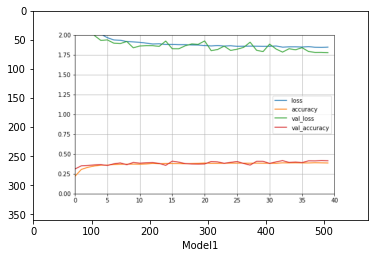

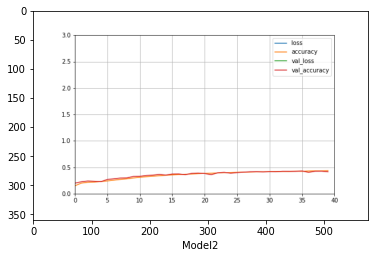

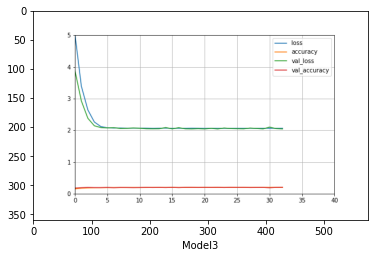

In [ ]:
showImage(path1, "Model1")
showImage(path2, "Model2")
showImage(path3, "Model3")



In [ ]:
# in model1 the training loss and validation loss is quite similar, its accuracy is 0.4157, and we used adam optimizer
# in model2 the training loss and validation loss is quite similar, its accuracy is 0.4154, and we used sgd optimizer

# in model3 the accuracy on the validation set is 0.2052 => in model1 we used hidden_layers = 8 and hidden_units = 77 while in
# model3 we used hidden_layers = 6 and hidden_units = 60 => as we decreased the total number of parameter as compared to 
#model1 it gave worse results, And generally we can expect that as number of hidden layers and hidden units increase we should get
#better model but this thing also leads to slow performance and we need to tackle overfitting also(if it happens)